In [87]:
import sys
sys.path.append('..')
from src.analysis.model_performances import *
from src.common import *
from helpers import *

In [98]:
answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = ACCURACY_SCORE_KEY#F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = F1_SCORE_KEY)

ids_file_name = f'small_dataset_ids.20'  # None
save_main_dir = f'{STATISTICS_PATH}.{ids_file_name}'
stats_all = collect_stats_all(tf_answer_type(score_key = score_key), save_main_dir=save_main_dir)

save_dir = os.path.join(save_main_dir, 'plots', 'by_categories')
os.makedirs(save_dir, exist_ok=True)

100%|██████████| 25920/25920 [00:00<00:00, 44817.59it/s]


In [99]:
len(stats_all)

1079

In [103]:
plan_length = 19
model_name = 'gemini' #'gemma-2b-it'
prompt_type = 'few_shot_1'
categories = QUESTION_CATEGORIES[:-1]
subs = WITHOUT_RANDOM_SUB

In [104]:
def filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain,
                           answer_type, substitutions):
    filter_by = base_filter(ramifications, model_name, prompt_type, answer_type, substitutions)
    filter_by.extend([(OUT_OBJ_QUESTION_CATEGORY, {question_category}),
                      (OUT_OBJ_DOMAIN_NAME, {domain}),
                      (OUT_OBJ_PLAN_LENGTH, {plan_length})])

    results = filter_gather(stats_all, filter_by)
    if len(results) == 0:
        return None
    elif not len(results) == 1:
        raise ValueError(f'len(instance) == {len(results)}')
    else:
        return results[0]#[SK_RESULT]

# By Domain

by domain.gemini.few shot 1.without random sub.without ramifications.pl-19


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

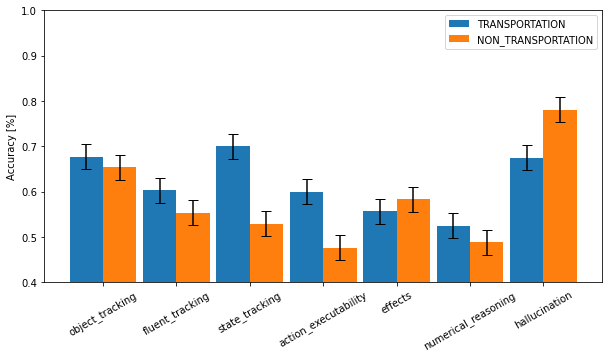

In [111]:
ramifications = WITHOUT_RAMIFICATIONS

data_all = []
for domain in [TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]:
    plt.figure()
    data = {NAME_KEY: domain, DATA_KEY: [], ERROR_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            if res:
                data[DATA_KEY].append(res[SK_RESULT])
                data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
            else:
                data[DATA_KEY].append(None)
                data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('Accuracy [%]')
plt.ylim([0.4,1])
file_name = f'by_domain.{model_name}.{prompt_type}.{subs}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{file_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(file_name.replace('_', ' '))

In [106]:
data_all

[{'name': 'TRANSPORTATION',
  'data': [0.6773049645390071, 0.603125, 0.7, 0.6, 0.55625, 0.525, 0.675],
  'error': [0.027839646556474775,
   0.02734988770400849,
   0.07245688373094719,
   0.07745966692414832,
   0.03927753313759662,
   0.07895805848676878,
   0.07405656621799311]},
 {'name': 'NON_TRANSPORTATION',
  'data': [0.6537102473498233,
   0.553125,
   0.5294117647058824,
   0.47619047619047616,
   0.5828220858895705,
   0.4878048780487805,
   0.7804878048780488],
  'error': [0.02828259462133356,
   0.0277926324755658,
   0.12105782480647684,
   0.07706415178216067,
   0.03862200825977068,
   0.07806365117108506,
   0.06464284453161749]}]


# By Ramifications

by ramifications.gemini.few shot 1.without random sub.ALL DOMAINS.pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

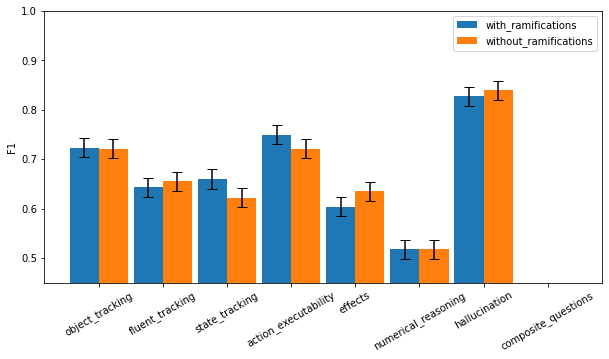

In [96]:
domain = ALL_DOMAINS_KEY

data_all = []
for ramifications in RAMIFICATION_TYPES:
    plt.figure()
    data = {NAME_KEY: ramifications, DATA_KEY: [], ERROR_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            if res:
                data[DATA_KEY].append(res[SK_RESULT])
                data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
            else:
                data[DATA_KEY].append(None)
                data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.45,1])

save_name = f'by_ramifications.{model_name}.{prompt_type}.{subs}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('_', ' '))

# By Subs

by subs.gemini.few shot 1.ALL DOMAINS.with ramifications.pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

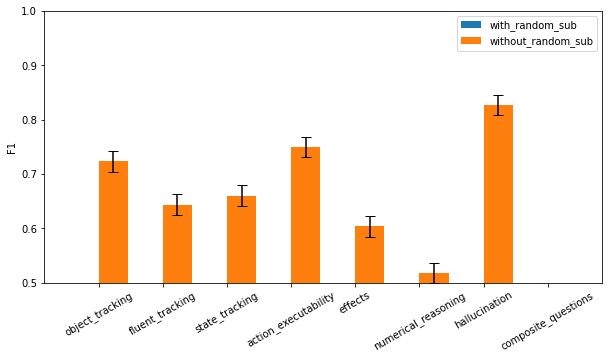

In [97]:
domain = ALL_DOMAINS_KEY
ramifications = WITH_RAMIFICATIONS

data_all = []
for subs in SUBSTITUTION_TYPES:
    plt.figure()
    data = {NAME_KEY: subs, DATA_KEY: [], ERROR_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            if res:
                data[DATA_KEY].append(res[SK_RESULT])
                data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
            else:
                data[DATA_KEY].append(None)
                data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name = f'by_subs.{model_name}.{prompt_type}.{domain}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('_', ' '))